In [2]:
#import libraries
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#upload the dataset
supply_data=pd.read_csv('./supply_chain_data.csv')
#read the data head
supply_data.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


Cleaning the data

In [4]:
# Dropping the duplicates
supply_data.drop_duplicates(inplace=True)


In [5]:
# Handling missing values
supply_data.fillna(supply_data.mean(), inplace=True)
supply_data.head()

C:\Users\chris\AppData\Local\Temp\ipykernel_7156\516109884.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  supply_data.fillna(supply_data.mean(), inplace=True)


,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


Performing sales Analysis to examine the number of products sold and the revenue generated to identify trends in sales
Therefore we need to have a sales column to be able to conduct a sales analysis
Sales = Number of Products sold * Price

In [6]:
# Creating a sales Column
supply_data['Sales']=supply_data['Price'] * supply_data['Number of products sold']
supply_data.head()


,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs,Sales
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075,55986.020445
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579,10924.833130
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282,90.557466
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159,5076.557470
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632,4185.587048


In [7]:
# Use groupby() to analyse sales
#grouped_data=supply_data.groupby('Product type').sum('Sales')
# Sort the grouped data in ascending order by the Sales column
grouped_data = supply_data.groupby('Product type')['Sales'].sum()
sorted_data = grouped_data.sort_values(ascending=True)

print(sorted_data)





Product type
cosmetics    6.005805e+05
haircare     6.328962e+05
skincare     1.052073e+06
Name: Sales, dtype: float64


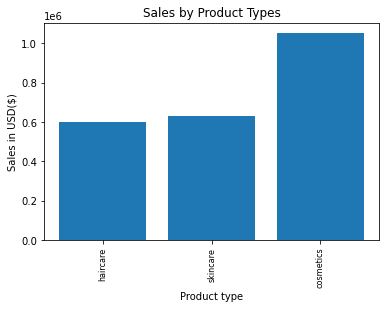

In [8]:


# Visualize the Data
results = supply_data.groupby('Product type')['Sales'].sum()
products = [product for product in supply_data['Product type'].unique()]

plt.bar(products, results)
plt.title('Sales by Product Types')
plt.xticks(products, rotation='vertical', size=8)
plt.xlabel('Product type')
plt.ylabel('Sales in USD($)')
plt.show()


Therefore from this data Cosmetics had the highest number of sales followed by haircare and the skincare

Which customer demographics buy more products?

In [9]:
# Use the groupby() method to group the Customer demographics in terms of sales
#This Outputs the Demographic that makes more purchases
supply_data.groupby('Customer demographics')['Sales'].sum()

Customer demographics
Female        488298.612847
Male          487686.101811
Non-binary    476206.545654
Unknown       833358.704367
Name: Sales, dtype: float64

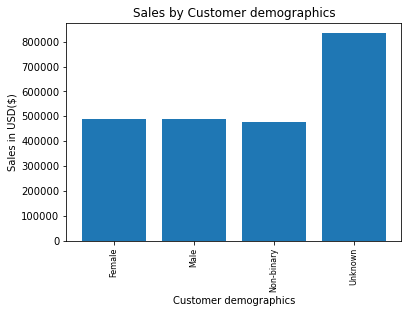

In [10]:
# Visualize the data
results = supply_data.groupby('Customer demographics')['Sales'].sum()
demographics = [demographics for demographics, df in supply_data.groupby('Customer demographics')]

plt.bar(demographics, results)
plt.title('Sales by Customer demographics')
plt.xticks(demographics, rotation='vertical', size= 8)
plt.xlabel('Customer demographics')
plt.ylabel('Sales in USD($)')
plt.show()


From the analysis and visualization, the Unknown demographics had the highest number of purchases as the other had fairly the same

Perform Inventory analysis to analyze stock levels, lead times, and other quantities to optimize inventory management
Question; What is the ability of the company to meet customer demand in a timely and efficient manner
In this question you have to do analysis of the Lead time


In [11]:
supply_data.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs,Sales
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075,55986.020445
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579,10924.833130
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282,90.557466
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159,5076.557470
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632,4185.587048


In [12]:
# Calculate the average lead time for each product type
mean_lead_time = supply_data.groupby('Product type')['Lead times'].mean()
print(mean_lead_time)


Product type
cosmetics    15.384615
haircare     15.529412
skincare     16.700000
Name: Lead times, dtype: float64


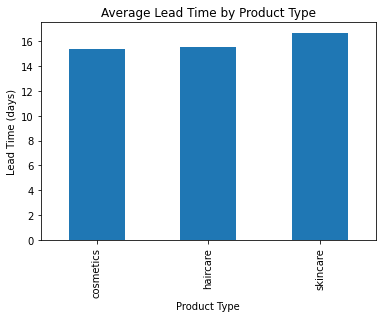

In [13]:
# The visualize the results using a bar chart
mean_lead_time.plot(kind='bar')
plt.title('Average Lead Time by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Lead Time (days)')
plt.show()

Based on the graph, it appears that the company is meeting customer demand in a timely and efficient manner for skincare products, as they have the highest sales. However, there may be some room for improvement for haircare and cosmetics products, as they have lower sales compared to skincare

Question;  What is the ability of the company to meet customer demand without experiencing stock-outs or back-orders for the different products

Use Stock Levels to determine this

In [14]:
# Group the data by product type and calculate the average stock level for each product type
results = supply_data.groupby('Product type')['Stock levels'].mean()
print(results)

Product type
cosmetics    58.653846
haircare     48.352941
skincare     40.200000
Name: Stock levels, dtype: float64


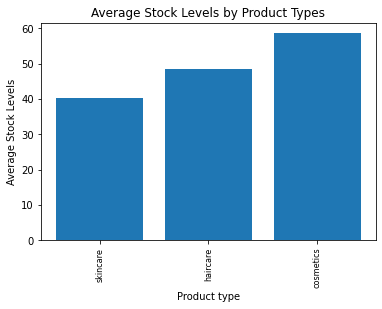

In [15]:

# Sort the results in ascending order of stock levels
results = results.sort_values()

# Visualize the results in a bar chart to compare the stock levels of each product type
plt.bar(results.index, results.values)
plt.title('Average Stock Levels by Product Types')
plt.xlabel('Product type')
plt.ylabel('Average Stock Levels')
plt.xticks(rotation='vertical', size=8)
plt.show()


Based on the ranking of products by stock levels, it appears that the company may to meet customer demand without experiencing stock-outs or back-orders for certain products. Specifically, haircare and skincare products have relatively low stock levels, which may indicate that the company is at risk of running out of these products if demand increases. On the other hand, cosmetic products have higher stock levels, which suggests that the company may be better able to meet customer demand for these products without experiencing stock-outs or back-orders.


Question: What is the defect rate of the products
Defect rate is the % of products that have something wrong maybe due to shipping

In [18]:
#Average defect rate of all product types
defect_rate= supply_data.groupby('Product type')['Defect rates'].mean()
print(defect_rate)

Product type
cosmetics    1.919287
haircare     2.483150
skincare     2.334681
Name: Defect rates, dtype: float64


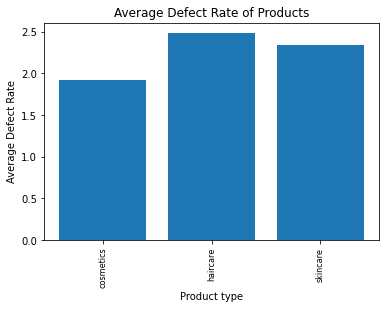

In [19]:
plt.bar(defect_rate.index, defect_rate.values)
plt.title('Average Defect Rate of Products')
plt.xlabel('Product type')
plt.ylabel('Average Defect Rate')
plt.xticks(rotation='vertical', size=8)
plt.show()

Therefore the average defect rate of haircare is higher

Find the defect rate by mode of transportation

In [22]:
supply_data.head()
#Group the Defect rate  by transportation mode then find the average
defect_rate_transport_mode=supply_data.groupby('Transportation modes')['Defect rates'].mean()
print(defect_rate_transport_mode)

Transportation modes
Air     1.823924
Rail    2.318814
Road    2.620938
Sea     2.315281
Name: Defect rates, dtype: float64


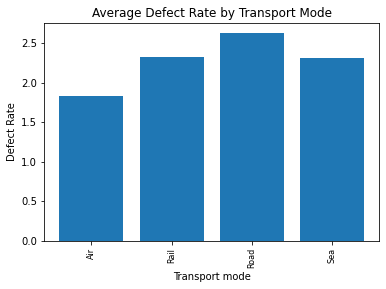

In [27]:
# Visualize the data
plt.bar(defect_rate_transport_mode.index, defect_rate_transport_mode.values)
plt.title('Average Defect Rate by Transport Mode')
plt.xlabel('Transport mode')
plt.ylabel('Defect Rate')
plt.xticks(rotation='vertical', size=8)
plt.show()

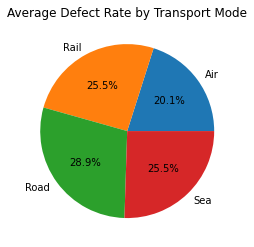

In [29]:
plt.pie(defect_rate_transport_mode.values, labels=defect_rate_transport_mode.index, autopct='%1.1f%%')
plt.title('Average Defect Rate by Transport Mode')
plt.show()


From the two plot s above, more products likely spoil through road as a means of transport and less likely to spoil when air is used as a mode of transport

In [30]:
supply_data.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs,Sales
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075,55986.020445
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579,10924.833130
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282,90.557466
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159,5076.557470
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632,4185.587048


Question: Which products have better quality compared to others
To determine the quality of the products, we do quality analysis by using the inspection results to figure out the quality of the products

In [35]:
quantity_counts=supply_data.groupby(['Product type', 'Inspection results'])
#Count the number of products for each group
counts=quantity_counts.size()
print(counts)

Product type  Inspection results
cosmetics     Fail                  10
              Pass                   6
              Pending               10
haircare      Fail                  13
              Pass                   6
              Pending               15
skincare      Fail                  13
              Pass                  11
              Pending               16
dtype: int64


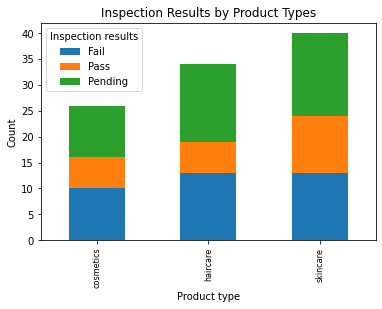

In [34]:
# Group the data by product type and inspection results
quantity_counts = supply_data.groupby(['Product type', 'Inspection results']).size().reset_index(name='Count')

# Pivot the data to get inspection results as columns and product type as rows
quantity_pivot = quantity_counts.pivot(index='Product type', columns='Inspection results', values='Count')

# Plot a stacked bar chart
quantity_pivot.plot(kind='bar', stacked=True)

# Add labels and title
plt.title('Inspection Results by Product Types')
plt.xlabel('Product type')
plt.ylabel('Count')
plt.xticks(rotation='vertical', size=8)

# Show the plot
plt.show()
# the groupby() function alone cannot work here since the Inspection results are not ints but string so they have to be counted

From the stacked bar above;
Skincare and haircare products fail more inspection than cosmetics and therefore need more quality improvement
Skincare also has more pass inspection results

Question; Which is the best route to use to save more?

In [38]:
# Use groupby()
routes= supply_data.groupby('Routes')['Costs'].mean()
print(routes)

Routes
Route A    485.483128
Route B    595.659028
Route C    500.470985
Name: Costs, dtype: float64


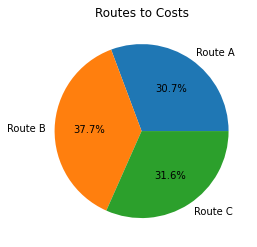

In [39]:
plt.pie(routes.values, labels=routes.index, autopct='%1.1f%%')
plt.title('Routes to Costs')
plt.show()


From the pie-chart, Route A is more cost effective since it takes only 30.7% and an average of 485.5 as compared to using route B which is the most expensive

Question; Which product produces more revenue to the firm?
This would involve examining revenue generated by each product to identify high-performing or low-performing products

In [46]:
supply_data.head()
revenue= supply_data.groupby('Product type')['Revenue generated'].sum().sort_values(ascending=False)
print(revenue)

Product type
skincare     241628.162133
haircare     174455.390605
cosmetics    161521.265999
Name: Revenue generated, dtype: float64


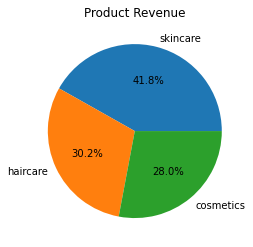

In [47]:
# Visualize the data
plt.pie(revenue.values, labels=revenue.index, autopct='%1.1f%%')
plt.title('Product Revenue')
plt.show()


Skincare produces more revenue of upto 41.8% followed by hairline products and lastly cosmetics revenue that brings the least revenue with 28%

Question; What will be the impact of 10% price increase in the revenue

1936500.142407791


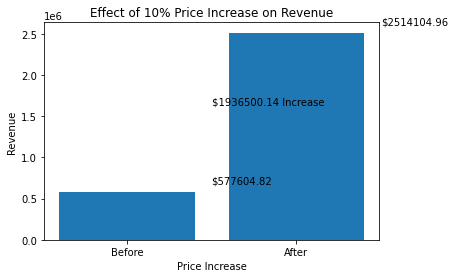

In [54]:
# Create a variable to hold the original revenue generated
original_revenue= supply_data['Revenue generated'].sum()
#Calculate the new revenue generated by increasing the price by 10%
new_revenue=  supply_data['Price'].apply(lambda x: x * 1.1).mul(supply_data['Number of products sold']).sum()
# calculate the difference between  the original revenue and new revenue:
revenue_difference= new_revenue-original_revenue
print(revenue_difference)
# The difference is 1936500.142407791
# create a bar chart to visualize the revenue difference
plt.bar(['Before', 'After'], [original_revenue, new_revenue])
plt.title('Effect of 10% Price Increase on Revenue')
plt.xlabel('Price Increase')
plt.ylabel('Revenue')
plt.text(0.5, original_revenue + 100000, f"${original_revenue:.2f}")
plt.text(1.5, new_revenue + 100000, f"${new_revenue:.2f}")
plt.text(0.5, (original_revenue + new_revenue) / 2 + 100000, f"${revenue_difference:.2f} Increase")
plt.show()

The 10% increase in the prices causes an increase of upto $1936500 in the revenue